In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
import joblib
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [66]:
df_normal = pd.read_csv('../Dataset/Simulasi/Hasil_Sniff_Normal.csv',sep=';')
df_normal.head(5)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,src,dst,protocol,length,time_tcp,time_previous,frame_length,label
0,694.817.062,10.0.3.3,10.0.1.1,TCP,74,0.000000000,0,74,0
1,694.834.167,10.0.1.1,10.0.3.3,TCP,74,0.017105000,0.017105,74,0
2,694.834.210,10.0.3.3,10.0.1.1,TCP,66,0.017148000,4.3e-05,66,0
3,694.834.358,10.0.3.3,10.0.1.1,TCP,103,0.017296000,0.000148,103,0
4,694.844.700,10.0.1.1,10.0.3.3,TCP,66,0.027638000,0.010342,66,0


In [67]:
df_udp = pd.read_csv('../Dataset/Simulasi/udp_icmp_data.csv',sep=';')
df_udp.head(5)

,time,src,dst,protocol,length,time_tcp,time_previous,frame_length,label
0,0.000000,fe80::4811:aeff:fee3:c505,ff02::fb,MDNS,107,0,0,107,0
1,8.004.892,fe80::4811:aeff:fee3:c505,ff02::fb,MDNS,107,0,0,107,0
2,24.021.491,fe80::4811:aeff:fee3:c505,ff02::fb,MDNS,107,0,0,107,0
3,56.032.198,fe80::4811:aeff:fee3:c505,ff02::fb,MDNS,107,0,0,107,0
4,120.033.125,fe80::4811:aeff:fee3:c505,ff02::fb,MDNS,107,0,0,107,0


In [68]:
df_attack =  pd.read_csv('../Dataset/Simulasi/udp_attack_dataset.csv',sep=';')
df_attack.head(5)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,src,dst,protocol,length,time_tcp,time_previous,frame_length,label
0,0,29.29.29.0,10.0.2.2,UDP,42,0,0,42,1
1,5e-06,29.29.29.0,10.0.2.2,UDP,42,0,0,42,1
2,1e-05,29.29.29.0,10.0.2.2,UDP,42,0,0,42,1
3,1.4e-05,29.29.29.0,10.0.2.2,UDP,42,0,0,42,1
4,1.8e-05,29.29.29.0,10.0.2.2,UDP,42,0,0,42,1


In [69]:
df_train = df_normal.append(df_udp)
df_train = df_train.append(df_attack)
df_train.head(5)

,time,src,dst,protocol,length,time_tcp,time_previous,frame_length,label
0,694.817.062,10.0.3.3,10.0.1.1,TCP,74,0.000000000,0,74,0
1,694.834.167,10.0.1.1,10.0.3.3,TCP,74,0.017105000,0.017105,74,0
2,694.834.210,10.0.3.3,10.0.1.1,TCP,66,0.017148000,4.3e-05,66,0
3,694.834.358,10.0.3.3,10.0.1.1,TCP,103,0.017296000,0.000148,103,0
4,694.844.700,10.0.1.1,10.0.3.3,TCP,66,0.027638000,0.010342,66,0


In [70]:
df_train.dtypes

time             object
src              object
dst              object
protocol         object
length            int64
time_tcp         object
time_previous    object
frame_length      int64
label             int64
dtype: object

In [71]:
df_train.src.unique()

array(['10.0.3.3', '10.0.1.1', 'fe80::3808:c8ff:fe4b:16a8',
       'fe80::4811:aeff:fee3:c505', '10.0.2.2', '29.29.29.0'],
      dtype=object)

In [72]:
df_train.dst.unique()

array(['10.0.1.1', '10.0.3.3', 'ff02::2', 'ff02::fb', '10.0.2.2'],
      dtype=object)

In [73]:
le = LabelEncoder()
le.fit(df_train.protocol)
df_train['protocol'] = le.transform(df_train['protocol'])
df_train.protocol.unique()

array([3, 1, 2, 4, 0])

In [74]:
le.fit(df_train.src)
df_train['src'] = le.transform(df_train['src'])
df_train.src.unique()

array([2, 0, 4, 5, 1, 3])

In [75]:
le.fit(df_train.dst)
df_train['dst'] = le.transform(df_train['dst'])
df_train.dst.unique()

array([0, 2, 3, 4, 1])

In [76]:
x = df_train[['src','dst','protocol','length']]
y = df_train[df_train.columns[-1:]]

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(1512069, 4, 1)

In [78]:
x_train = np.asarray(x_train).astype(np.float32)

In [79]:
model_full = Sequential()
model_full.add(LSTM(100, input_shape=(x_train.shape[1],1), return_sequences=True))
model_full.add(Dropout(0.5))
model_full.add(LSTM(32, return_sequences=False))
model_full.add(Dense(10, activation='relu'))
model_full.add(Dense(2, activation='softmax'))

model_full.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy','MeanSquaredError', 'MeanAbsoluteError'])
model_full.fit(x_train, y_train, epochs=20)


Epoch 1/20
47253/47253 [==============================] - 600s 13ms/step - loss: 0.0043 - accuracy: 0.9989 - mean_squared_error: 0.4981 - mean_absolute_error: 0.500012s - loss: 0.0043 - accuracy: 0.9988 - mean_squared_error: 0.4981 - m - - ETA: 9s - loss: 0.0043 - accuracy: 0.9988 - mean_squared_error: 0. - ETA: 3s - loss: 0.0043 - accuracy: 0.9988 - mean_squa - ETA: 2s - loss: 0.0043 - accuracy: 0.
Epoch 2/20
47253/47253 [==============================] - 498s 11ms/step - loss: 2.0081e-04 - accuracy: 1.0000 - mean_squared_error: 0.5000 - mean_absolute_error: 0.5000
Epoch 3/20
47253/47253 [==============================] - 524s 11ms/step - loss: 1.0603e-04 - accuracy: 1.0000 - mean_squared_error: 0.5000 - mean_absolute_error: 0.500011s - loss: 1.0633e-04 - accuracy: 1.0000 - mean_squared_error: 0.5000 - mean_absolu - ETA: 11s - loss: 1.0632e-04 - accuracy: 1. - ETA: 9s - loss: 1.0626e-04 - accuracy: 1.0000 - mean_squared_error: 0.5000 - - ETA: 8s - loss: 1.0622e-04 - accuracy: 1.0000 -

In [80]:
def calculate_precision(TP, FP):
    return TP/(TP+FP)


def calculate_fnr(TP, FP, FN):
    return FN/(TP+FP)

In [81]:
y_pred_train = lstm_model.predict(x_train)
y_pred_train

array([[0.05173271, 0.94826734],
       [0.99361527, 0.00638468],
       [0.05173271, 0.94826734],
       ...,
       [0.05173271, 0.94826734],
       [0.05173271, 0.94826734],
       [0.99361527, 0.00638468]], dtype=float32)

In [82]:
y_pred_train_1 = [x[0] for x in y_pred_train]
y_pred_train_2 = [x[1] for x in y_pred_train]

y_pred_train_1[:10]

[0.051732708,
 0.99361527,
 0.051732708,
 0.99361527,
 0.99361527,
 0.051732708,
 0.99361527,
 0.051732708,
 0.99361527,
 0.051732708]

In [83]:
df_x_train = x_train_awal
df_x_train['lstm_result_1'] = y_pred_train_1
df_x_train['lstm_result_2'] = y_pred_train_2
df_x_train['label'] = y_train
df_x_train

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,src,dst,protocol,length,lstm_result_1,lstm_result_2,label
85493,3,1,4,42,0.051733,0.948267,1
78093,2,0,3,1514,0.993615,0.006385,0
651799,3,1,4,42,0.051733,0.948267,1
375523,2,0,3,1514,0.993615,0.006385,0
745608,2,0,3,1514,0.993615,0.006385,0
...,...,...,...,...,...,...,...
804336,0,2,3,66,0.063403,0.936597,0
236793,3,1,4,42,0.051733,0.948267,1
864757,3,1,4,42,0.051733,0.948267,1
818219,3,1,4,42,0.051733,0.948267,1


In [84]:
y_test_pred = lstm_model.predict(x_test)
y_test_pred_1 = [x[0] for x in y_test_pred]
y_test_pred_2 = [x[1] for x in y_test_pred]

y_test_pred

array([[0.05173271, 0.94826734],
       [0.05173271, 0.94826734],
       [0.99361527, 0.00638468],
       ...,
       [0.99361527, 0.00638468],
       [0.06340321, 0.9365968 ],
       [0.99361527, 0.00638468]], dtype=float32)

In [85]:
df_x_test = x_test_awal
df_x_test['lstm_result_1'] = y_test_pred_1
df_x_test['lstm_result_2'] = y_test_pred_2
df_x_test['label'] = y_test
df_x_test

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,src,dst,protocol,length,lstm_result_1,lstm_result_2,label
363240,3,1,4,42,0.051733,0.948267,1
613282,3,1,4,42,0.051733,0.948267,1
748046,2,0,3,1514,0.993615,0.006385,0
517583,3,1,4,42,0.051733,0.948267,1
180702,3,1,4,42,0.051733,0.948267,1
...,...,...,...,...,...,...,...
839824,2,0,3,1514,0.993615,0.006385,0
941804,0,2,3,66,0.063403,0.936597,0
521766,2,0,3,1514,0.993615,0.006385,0
615980,0,2,3,66,0.063403,0.936597,0


In [86]:
df_x_train.to_csv('data_latih_simulation.csv', sep=',', index=False)
df_x_test.to_csv('data_test_simulation.csv',sep=',', index=False)

## Naive Bayes

In [87]:
nb_classifier = GaussianNB()
nb_classifier


GaussianNB()

In [88]:
df_train = pd.read_csv('data_latih_simulation.csv', sep=',')
df_test = pd.read_csv('data_test_simulation.csv', sep=',')
df_train

,src,dst,protocol,length,lstm_result_1,lstm_result_2,label
0,3,1,4,42,0.051733,0.948267,1
1,2,0,3,1514,0.993615,0.006385,0
2,3,1,4,42,0.051733,0.948267,1
3,2,0,3,1514,0.993615,0.006385,0
4,2,0,3,1514,0.993615,0.006385,0
...,...,...,...,...,...,...,...
1512064,0,2,3,66,0.063403,0.936597,0
1512065,3,1,4,42,0.051733,0.948267,1
1512066,3,1,4,42,0.051733,0.948267,1
1512067,3,1,4,42,0.051733,0.948267,1


In [91]:
df_train = df_train[['protocol','lstm_result_1','lstm_result_2','label']]
df_test = df_test[['protocol','lstm_result_1','lstm_result_2','label']]
df_train

,protocol,lstm_result_1,lstm_result_2,label
0,4,0.051733,0.948267,1
1,3,0.993615,0.006385,0
2,4,0.051733,0.948267,1
3,3,0.993615,0.006385,0
4,3,0.993615,0.006385,0
...,...,...,...,...
1512064,3,0.063403,0.936597,0
1512065,4,0.051733,0.948267,1
1512066,4,0.051733,0.948267,1
1512067,4,0.051733,0.948267,1


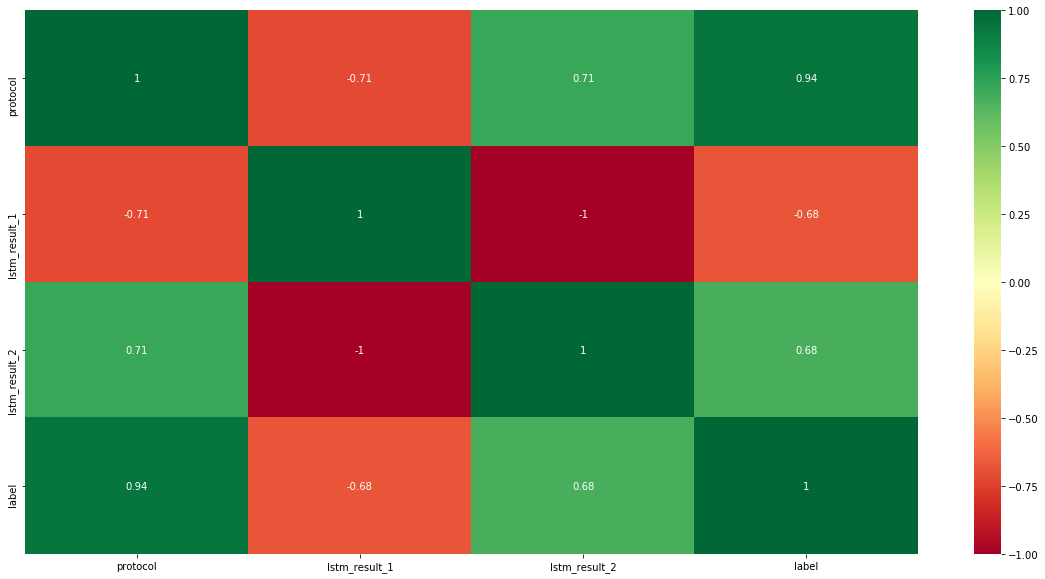

In [92]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [93]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [95]:
x_train = df_train[['protocol','lstm_result_1','lstm_result_2']]
y_train = df_train['label']

x_test = df_test[['protocol','lstm_result_1','lstm_result_2','label']]
y_test = df_test['label']
x_train

,protocol,lstm_result_1,lstm_result_2
0,4,0.051733,0.948267
1,3,0.993615,0.006385
2,4,0.051733,0.948267
3,3,0.993615,0.006385
4,3,0.993615,0.006385
...,...,...,...
1512064,3,0.063403,0.936597
1512065,4,0.051733,0.948267
1512066,4,0.051733,0.948267
1512067,4,0.051733,0.948267


In [96]:
x_train = df_train[['protocol','lstm_result_1','lstm_result_2']]
y_train =  df_train['label']

x_test = df_test[['protocol','lstm_result_1','lstm_result_2']]
y_test = df_test['label']

x_train

,protocol,lstm_result_1,lstm_result_2
0,4,0.051733,0.948267
1,3,0.993615,0.006385
2,4,0.051733,0.948267
3,3,0.993615,0.006385
4,3,0.993615,0.006385
...,...,...,...
1512064,3,0.063403,0.936597
1512065,4,0.051733,0.948267
1512066,4,0.051733,0.948267
1512067,4,0.051733,0.948267


In [97]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

NB_Feature_Grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='accuracy' ,verbose=1, cv=10, n_jobs=1)
NB_Feature_Grid.fit(x_train, y_train)
print(NB_Feature_Grid.best_estimator_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed: 77.6min finished


GaussianNB(var_smoothing=0.00021544346900318845)


In [98]:
print(NB_Feature_Grid.best_score_)

1.0


In [99]:
best_estimator = NB_Feature_Grid.best_estimator_
best_estimator

GaussianNB(var_smoothing=0.00021544346900318845)

In [100]:
#Save Best Estimator 
joblib.dump(best_estimator, 'naive_bayes_simulation_final.pkl')

['naive_bayes_simulation_final.pkl']

In [102]:
nb_classifier = best_estimator

In [103]:
nb_classifier.fit(x_train, y_train)

GaussianNB(var_smoothing=0.00021544346900318845)

In [104]:
train_pred = nb_classifier.predict(x_train)
test_pred = nb_classifier.predict(x_test)

In [105]:
cm = confusion_matrix(y_train, train_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_train, train_pred))
print("Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[734017      0]
 [     0 778052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    778052
           1       1.00      1.00      1.00    734017

    accuracy                           1.00   1512069
   macro avg       1.00      1.00      1.00   1512069
weighted avg       1.00      1.00      1.00   1512069

Accuracy: 100.0
Precision 100.0
False Negative Rate 0.0


In [106]:
cm = confusion_matrix(y_test, test_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_test, test_pred))
print("Accuracy:",accuracy_score(y_test, test_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[314558      0]
 [     0 333472]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    333472
           1       1.00      1.00      1.00    314558

    accuracy                           1.00    648030
   macro avg       1.00      1.00      1.00    648030
weighted avg       1.00      1.00      1.00    648030

Accuracy: 100.0
Precision 100.0
False Negative Rate 0.0
